<a href="https://colab.research.google.com/github/mohiuddinshahrukh/ML_LAB_2/blob/main/Problem_Analysis_and_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

The goal of this lab is to introduce you to data preprocessing techniques in order to make your data suitable for applying a learning algorithm.

## 1. Handling Missing Values

A common (and very unfortunate) data property is the ocurrence of missing and erroneous values in multiple features in datasets. For this exercise we will be using a data set about abalone snails.
The data set is contained in the Zip file you downloaded from Moodle (abalone.csv).

To determine the age of a abalone snail you have to kill the snail and count the annual
rings. You are told to estimate the age of a snail on the basis of the following attributes:
1. type: male (0), female (1) and infant (2)
2. length in mm
3. width in mm
4. height in mm
5. total weight in grams
6. weight of the meat in grams
7. drained weight in grams
8. weight of the shell in grams
9. number of annual rings (number of rings +1, 5 yields age)

However, the data is incomplete. Missing values are marked with −1.

In [3]:
!git clone https://github.com/mohiuddinshahrukh/ML_LAB_2.git


Cloning into 'ML_LAB_2'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 11 (delta 4), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (11/11), 68.51 KiB | 887.00 KiB/s, done.
Resolving deltas: 100% (4/4), done.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# load data
df = pd.read_csv("./ML_LAB_2/abalone.csv") #Should this not work please use the csv that was part of the zip file.
df.columns=['type','length','width','height','total_weight','meat_weight','drained_weight','shell_weight','num_rings']
df.head()

,type,length,width,height,total_weight,meat_weight,drained_weight,shell_weight,num_rings
0,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,-1
1,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,2,-1.000,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


### Exercise 1.1

Compute the mean of of each numeric column and the counts of each categorical column, excluding the missing values.

In [5]:
##################
#INSERT CODE HERE#
means_of_numeric_values = df[['type','length','width','height', 'total_weight','meat_weight','drained_weight','shell_weight','num_rings']].mean()
print(means_of_numeric_values)
##################

type              0.912835
length            0.478448
width             0.366148
height            0.105771
total_weight      0.782421
meat_weight       0.318576
drained_weight    0.149442
shell_weight      0.208351
num_rings         9.662835
dtype: float64


### Exercise 1.2

Compute the median of each numeric column,  excluding the missing values.

In [6]:
##################
#INSERT CODE HERE#
medians_of_numeric_values = df[['type','length','width','height', 'total_weight','meat_weight','drained_weight','shell_weight','num_rings']].median()
print(medians_of_numeric_values)
##################

type              1.000
length            0.535
width             0.420
height            0.140
total_weight      0.782
meat_weight       0.327
drained_weight    0.166
shell_weight      0.225
num_rings         9.000
dtype: float64


### Exercise 1.3

Handle the missing values in a way that you find suitable. Think about different ways. Discuss dis-/advantages of your approach. Argue your choices.


In [8]:
##################
#INSERT CODE HERE#
are_any_values_missing = df.isnull().values.any()
print("Values missing: ", are_any_values_missing,'\n')

# Missing values are marked with -1
how_many_missing_values_in_all_cols = (df==-1).sum()
print('Total missing data points:\n',how_many_missing_values_in_all_cols)

cols_containing_min1 = df.columns[(df==-1).any()]
print("\nColumns with missing values: ", list(cols_containing_min1))

how_many_non_missing_values_in_all_cols = (df!=-1).sum()
print("\nTotal Number of non-missing values: ", list(how_many_non_missing_values_in_all_cols))

# Since there is missing value in every table, we can't drop the columns.
# We can try dropping the rows.
df_cleaned = df[~(df == -1).any(axis=1)]

print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_cleaned.shape}")
##################
# Advantage: No more missing values,
# Disadvantage: Loss of useful information.

Values missing:  False 

Total missing data points:
 type               87
length            124
width             124
height            124
total_weight      106
meat_weight       125
drained_weight    109
shell_weight      102
num_rings          99
dtype: int64

Columns with missing values:  ['type', 'length', 'width', 'height', 'total_weight', 'meat_weight', 'drained_weight', 'shell_weight', 'num_rings']

Total Number of non-missing values:  [4089, 4052, 4052, 4052, 4070, 4051, 4067, 4074, 4077]
Original shape: (4176, 9)
Cleaned shape: (3271, 9)


### Exercise 1.4

Perform Z-score normalization on every column (except the type of course!)

In [19]:
##################
#INSERT CODE HERE#
df_cleaned_dropped_type = df_cleaned.drop('type',axis=1)
for column_name in df_cleaned_dropped_type:
  colMean = df_cleaned_dropped_type[column_name].mean()
  # print('\nColumn Mean: ', colMean)
  colStd = df_cleaned_dropped_type[column_name].std()
  # print('\nColumn Standard Deviation: ', colStd)
  zScore=(df_cleaned_dropped_type[column_name]-colMean)/colStd
  # print('\nZ-Score: ', zScore)

  df_cleaned_dropped_type[column_name] = zScore



##################

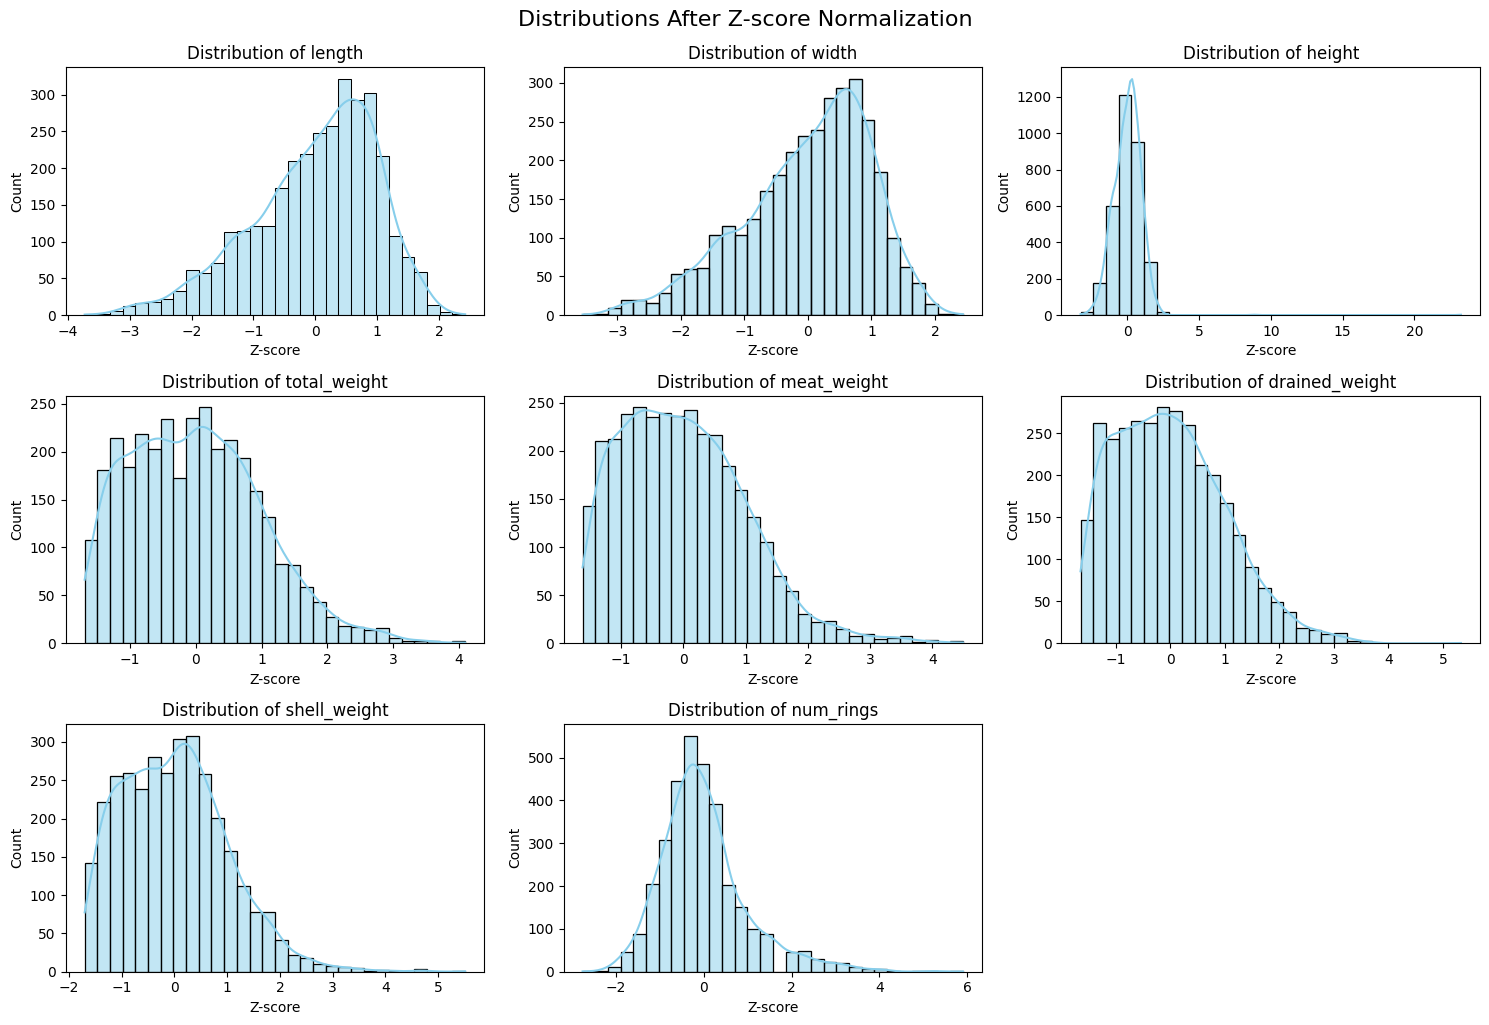

In [21]:
# Visualization of the data:
# Plot histograms with KDE (Kernel Density Estimate)
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_cleaned_dropped_type.columns):
    plt.subplot(3, 3, i + 1)  # Adjust based on number of columns
    sns.histplot(df_cleaned_dropped_type[column], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {column}")
    plt.xlabel("Z-score")
    plt.tight_layout()

plt.suptitle("Distributions After Z-score Normalization", fontsize=16, y=1.02)
plt.show()

## 2. Preprocessing text (Optional)

One possible way to transform text documents into vectors of numeric attributes is to use the TF-IDF representation. We will experiment with this representation using the 20 Newsgroup data set. The data set contains postings on 20 different topics. The classification problem is to decide which of the topics a posting falls into. Here, we will only consider postings about medicine and space.

In [22]:
from sklearn.datasets import fetch_20newsgroups


categories = ['sci.med', 'sci.space']
raw_data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
print(f'The index of each category is: {[(i,target) for i,target in enumerate(raw_data.target_names)]}')

The index of each category is: [(0, 'sci.med'), (1, 'sci.space')]


Check out some of the postings, might find some funny ones!

In [ ]:
import numpy as np
idx = np.random.randint(0, len(raw_data.data))
print (f'This is a {raw_data.target_names[raw_data.target[idx]]} email.\n')
print (f'There are {len(raw_data.data)} emails.\n')
print(raw_data.data[idx])

Lets pick the first 10 postings from each category

In [ ]:
idxs_med = np.flatnonzero(raw_data.target == 0)
idxs_space = np.flatnonzero(raw_data.target == 1)
idxs = np.concatenate([idxs_med[:10],idxs_space[:10]])
data = np.array(raw_data.data)
data = data[idxs]

<a href="http://www.nltk.org/">NLTK</a> is a toolkit for natural language processing. Take some time to install it and go through this <a href="http://www.slideshare.net/japerk/nltk-in-20-minutes">short tutorial/presentation</a>. (or use e.g. Google colab where the package is prepared already)

The downloaded package below is a tokenizer that divides a text into a list of sentences, by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences.

In [ ]:
import nltk
import itertools
nltk.download('punkt')

# Tokenize the sentences into words
tokenized_sentences = [nltk.word_tokenize(sent) for sent in data]
vocabulary_size = 1000
unknown_token = 'unknown'

In [ ]:
# Count the word frequencies
word_freq = nltk.FreqDist(itertools.chain(*tokenized_sentences))
print (f"Found {len(word_freq.items())} unique words tokens.")

In [ ]:
# Get the most common words and build index_to_word and word_to_index vectors
vocab = word_freq.most_common(vocabulary_size-1)
index_to_word = [x[0] for x in vocab]
index_to_word.append(unknown_token)
word_to_index = dict([(w,i) for i,w in enumerate(index_to_word)])

print (f"Using vocabulary size {vocabulary_size}." )
print (f"The least frequent word in our vocabulary is '{vocab[-1][0]}' and appeared {vocab[-1][1]} times.")

### Exercise 2.1

Code your own TF-IDF representation function and use it on this dataset. (Don't use code from libraries. Build your own function with Numpy/Pandas). Use the formular TFIDF = TF * (IDF+1). The effect of adding “1” to the idf in the equation above is that terms with zero idf, i.e., terms that occur in all documents in a training set, will not be entirely ignored. The term frequency is the raw count of a term in a document. The inverse document frequency is the natural logarithm of the inverse fraction of the documents that contain the word.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
countvec = CountVectorizer()
df = pd.DataFrame(countvec.fit_transform(data).toarray(), columns=countvec.get_feature_names_out())

def tfidf(df):

    ##################
    #INSERT CODE HERE#
    ##################
    return None


rep = tfidf(df)

# Check if your implementation is correct
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(norm=None, smooth_idf=False, use_idf=True)
X_train = pd.DataFrame(vectorizer.fit_transform(data).toarray(), columns=countvec.get_feature_names_out())
answer=['No','Yes']
epsilon = 0.0001
if rep is None:
  print (f'Is this implementation correct?\nAnswer: {answer[0]}')
if rep is not None:
  print (f'Is this implementation correct?\nAnswer: {answer[1*np.all((X_train - rep) < epsilon)]}')

In [ ]:
# an example of what to do with these similarities:


# analysis with tf-idf
from sklearn.metrics.pairwise import cosine_similarity

similiarities = cosine_similarity(rep, rep) # measure of the similarity of the direction of two vectors

In [ ]:
np.fill_diagonal(similiarities, 0)
max_ind = np.unravel_index(similiarities.argmax(), similiarities.shape)
similiarities[max_ind] # highest similarity of two documents